# prueba de inteligencia artificial

En nuestra Primera Clase Tenemos la Base de datos en SQlite

CREATE TABLE "personas" (
	"id"	INTEGER NOT NULL,
	"nombre"	TEXT NOT NULL,
	"direccion"	TEXT,
	"telefono"	TEXT,
	"correo"	TEXT,
	PRIMARY KEY("id" AUTOINCREMENT)
)

CREATE TABLE "producto" (
	"id"	INTEGER NOT NULL,
	"nombre"	TEXT NOT NULL,
	"precio"	REAL,
	"stock"	INTEGER,
	PRIMARY KEY("id" AUTOINCREMENT)
)

# En nuestra Clase personaVentana Tenemos



Hemos aprendido a usar tkinter para esta prueba, esta libreria es para Interfaz grafica , en esta clase hemos implementado el crear de nuestra Persona, como: NOMBRE,DIRECCION,TELEFONO,CORREO. Aqui es que implementamos la conexion a la base de datos para que se creara en nuestra Tabla personas.

In [ ]:
from tkinter import ttk
from tkinter import*
import sqlite3

class Persona:

    def __init__(self,window):
        self.win=window
        self.win.title('VentanaPersona')

        frame = LabelFrame(self.win, text="Registrar Persona")
        frame.grid(row=0, column=0, columnspan=3, pady=80,padx=80)
        # Nombre
        Label(frame, text='Nombre').grid(row=1, column=0)
        self.name = Entry(frame)
        self.name.focus()
        self.name.grid(row=1, column=1)
        # Direccion
        Label(frame, text='Direccion').grid(row=2, column=0)
        self.direcc = Entry(frame)
        self.direcc.grid(row=2, column=1)

        # Telefono
        Label(frame, text='Telefono').grid(row=3, column=0)
        self.telf= Entry(frame)
        self.telf.grid(row=3, column=1)

        Label(frame, text='Correo').grid(row=4, column=0)
        self.correo = Entry(frame)
        self.correo.grid(row=4, column=1)


        #Boton
        ttk.Button(frame,text = 'Guardar Persona', command=self.agregar_producto).grid(row=5,columnspan=2,sticky = W+E)
        #Mensaje


        #Tabla

        self.tree=ttk.Treeview(frame,columns=('#0','#1','#2','#3'))
        self.tree.grid(row=6,column=0,columnspan=8)
        self.tree.heading('#0',text='Nombre', anchor=CENTER)
        self.tree.heading('#1',text='Direccion', anchor=CENTER)
        self.tree.heading('#2', text='Telefono', anchor=CENTER)
        self.tree.heading('#3', text='Correo', anchor=CENTER)

        self.get_product()

    db_name = 'database.db'

    def run_query(self, query, parameters=()):
        with  sqlite3.connect(self.db_name) as conn:
            cursor = conn.cursor()
            result = cursor.execute(query,parameters)
            conn.commit()
        return result

    def get_product(self):
        records=self.tree.get_children()
        for elemento in records:
            self.tree.delete(elemento)
        #query
        query = 'Select* from personas ORDER BY nombre ASC'
        db_rows = self.run_query(query)
        for row in db_rows:
            self.tree.insert('',0, text=row[1], values=(row[2],row[3],row[4]))
    def validacionPro(self):
        return len(self.name.get())!=0 and len(self.direcc.get())!=0 and len(self.telf.get())!=0 and len(self.correo.get())!=0

    def agregar_producto(self):
        if self.validacionPro():
            query='INSERT INTO personas VALUES(NULL,?,?,?,?)'
            parameters=(self.name.get(),self.direcc.get(),self.telf.get(),self.correo.get())
            self.run_query(query,parameters)

            self.name.delete(0,END)
            self.direcc.delete(0,END)
            self.telf.delete(0, END)
            self.correo.delete(0, END)
        else:
            self.message['text']='Requiere colocar datos'
        self.get_product()
if __name__=='__main__':
    window= Tk()
    application=Persona(window)
    window.mainloop()


# En nuestra Clase productosVentana


In [ ]:
En esta Clase , tendremos la posibilidad de visualizar nuestros productos , asi mismo , crear nuesstro producto con el nombre,
precio y stock. En esta ventana Creamos los productos que esta enlazado a mi base de datos.

In [ ]:
from tkinter import ttk
from tkinter import*
import sqlite3

class Producto:




    def __init__(self,window):
        self.win=window
        self.win.title('VentanaProducto')

        frame = LabelFrame(self.win, text="Registrar Producto")
        frame.grid(row=0, column=0, columnspan=3, pady=80,padx=80)
        # Nombre
        Label(frame, text='Nombre').grid(row=1, column=0)
        self.name = Entry(frame)
        self.name.focus()
        self.name.grid(row=1, column=1)
        # Direccion
        Label(frame, text='precio').grid(row=2, column=0)
        self.price = Entry(frame)
        self.price.grid(row=2, column=1)

        # Telefono
        Label(frame, text='stock').grid(row=3, column=0)
        self.stock= Entry(frame)
        self.stock.grid(row=3, column=1)


        #Boton
        ttk.Button(frame,text = 'Guardar Producto', command=self.agregar_producto).grid(row=5,columnspan=2,sticky = W+E)
        #Mensaje

        self.message=Label(text='',fg='red')
        self.message.grid(row=4,column=0,columnspan=2,sticky=W+E)
        #Tabla

        self.tree=ttk.Treeview(frame,columns=('#0','#1','#2'))
        self.tree.grid(row=6,column=0,columnspan=8)
        self.tree.heading('#0',text='Nombre', anchor=CENTER)
        self.tree.heading('#1',text='Precio', anchor=CENTER)
        self.tree.heading('#2', text='Stock', anchor=CENTER)
        self.get_product()

    db_name = 'database.db'

    def run_query(self, query, parameters=()):
        with  sqlite3.connect(self.db_name) as conn:
            cursor = conn.cursor()
            result = cursor.execute(query,parameters)
            conn.commit()
        return result

    def get_product(self):
        records=self.tree.get_children()
        for elemento in records:
            self.tree.delete(elemento)
        #query
        query = 'Select* from producto ORDER BY 1'
        db_rows = self.run_query(query)
        for row in db_rows:
            self.tree.insert('',0, text=row[1], values=(row[2],row[3]))
    def validacionPro(self):
        return len(self.name.get())!=0 and len(self.price.get())!=0 and len(self.stock.get())!=0

    def agregar_producto(self):
        if self.validacionPro():
            query='INSERT INTO producto VALUES(NULL,?,?,?)'
            parameters=(self.name.get(),self.price.get(),self.stock.get())
            self.run_query(query,parameters)
            self.message['text']='{} Agregado'.format(self.name.get())
            self.name.delete(0,END)
            self.price.delete(0,END)
            self.stock.delete(0, END)
        else:
            self.message['text']='Requiere colocar datos'
        self.get_product()
if __name__=='__main__':
    window= Tk()
    application=Producto(window)
    window.mainloop()


# Ventana Compras

En esta ventana , se prepara para que el cliente compre los productos , asi mismo se visualizar los productos que estan creados.

In [ ]:
from tkinter import ttk
from tkinter import*
import sqlite3

class Compras:

    def __init__(self,window):
        self.win=window
        self.win.title('VentanaCompras')

        frame = LabelFrame(self.win, text="Productos")
        frame.grid(row=0, column=0, columnspan=3, pady=10,padx=0)
        #Boton
        #ttk.Button(frame,text = 'Guardar Persona', command=self.agregar_producto).grid(row=5,columnspan=2,sticky = W+E)
        #Mensaje
        #Tabla
        self.tree = ttk.Treeview(frame, columns=('#0', '#1', '#2'))
        self.tree.grid(row=1, column=0, columnspan=12)
        self.tree.heading('#0', text='Nombre', anchor=CENTER)
        self.tree.heading('#1', text='Precio', anchor=CENTER)
        self.tree.heading('#2', text='Stock', anchor=CENTER)
        self.get_product()
        frame = LabelFrame(self.win, text="Persona")
        frame.grid(row=1, column=0, columnspan=3, pady=20, padx=20)

        self.tree = ttk.Treeview(frame, columns=('#0', '#1', '#2', '#3'))
        self.tree.grid(row=2, column=0, columnspan=10)
        self.tree.heading('#0', text='Nombre', anchor=CENTER)
        self.tree.heading('#1', text='Direccion', anchor=CENTER)
        self.tree.heading('#2', text='Telefono', anchor=CENTER)
        self.tree.heading('#3', text='Correo', anchor=CENTER)

        self.get_persona()

    db_name = 'database.db'

    def run_query(self, query, parameters=()):
        with  sqlite3.connect(self.db_name) as conn:
            cursor = conn.cursor()
            result = cursor.execute(query,parameters)
            conn.commit()
        return result

    def get_product(self):
            records = self.tree.get_children()
            for elemento in records:
                self.tree.delete(elemento)
            # query
            query = 'Select* from producto ORDER BY 1'
            db_rows = self.run_query(query)
            for row in db_rows:
                self.tree.insert('', 0, text=row[1], values=(row[2], row[3]))
    def validacionPro(self):
        return len(self.name.get())!=0 and len(self.direcc.get())!=0 and len(self.telf.get())!=0 and len(self.correo.get())!=0

    def get_persona(self):
        records=self.tree.get_children()
        for elemento in records:
            self.tree.delete(elemento)
        #query
        query = 'Select* from personas ORDER BY nombre ASC'
        db_rows = self.run_query(query)
        for row in db_rows:
            self.tree.insert('',0, text=row[1], values=(row[2],row[3],row[4]))
if __name__=='__main__':
    window= Tk()
    application=Compras(window)
    window.mainloop()









# Tenemos un ejemplo en como crear nuestra base de datos
 Aqui tenemos en como crear nuestros campos en nuestra Base de Datos. Se puede crear de forma de codigo o forma grafica.

In [ ]:
#import sqlite3
#import os
#APP_PATH=os.getcwd()
#DB_PATH=APP_PATH+'/database.db'
"""
con = sqlite3.connect(DB_PATH)
cursor=con.cursor()
cursor.execute(
    """
    #CREATE TABLE PERSONA(
    #ID          INT     PRIMARE KEY NOT NULL,
    #NOMBRE      TEXT    NOT NULL,
    #DIRECCION   TEXT    NOT NULL,
    #TELEFONO    TEXT    NOT NULL,
    #CORREO      TEXT    NOT NULL
    #)
    """
)
con.close()"""

FUNCIONAMIENTO DE NUESTRA APLICACION DE NUESTRA VENTANA PRODUCTO
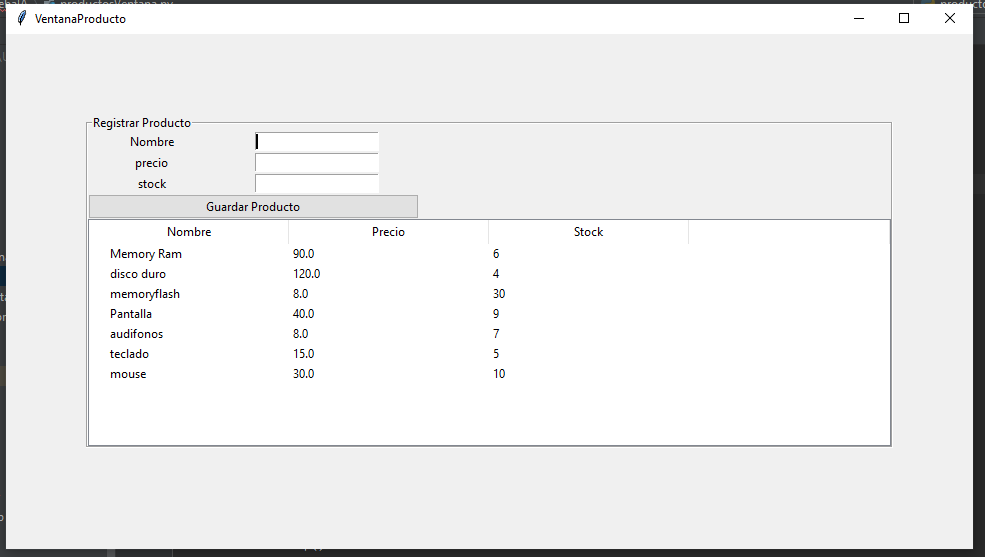

FUNCIONAMIENTO DE NUESTRA APLICACION DE LA VENTANA PERSONA
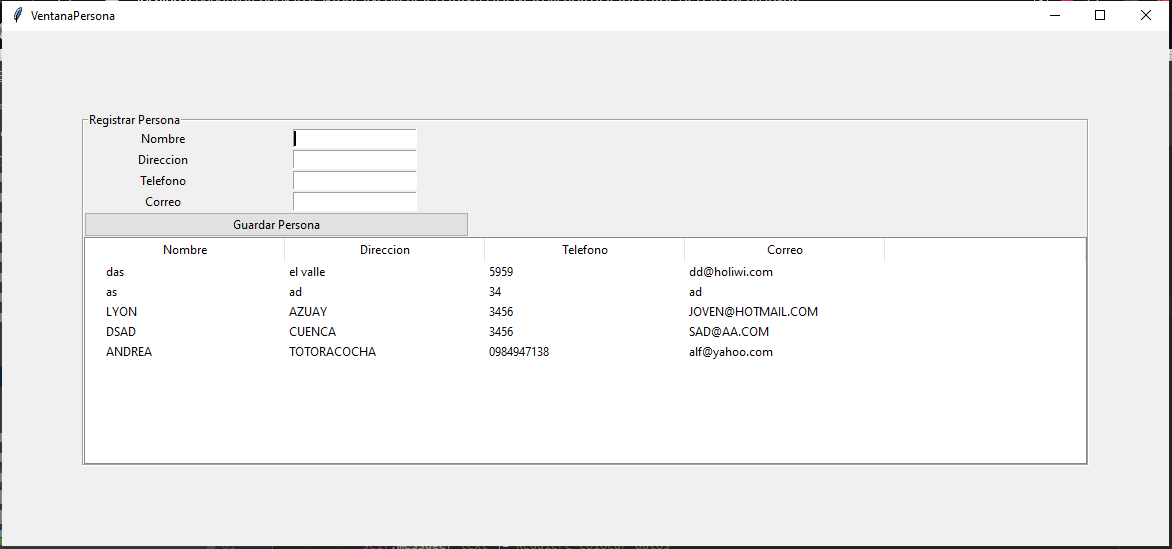


CLASE PARA LAS COMPRAS
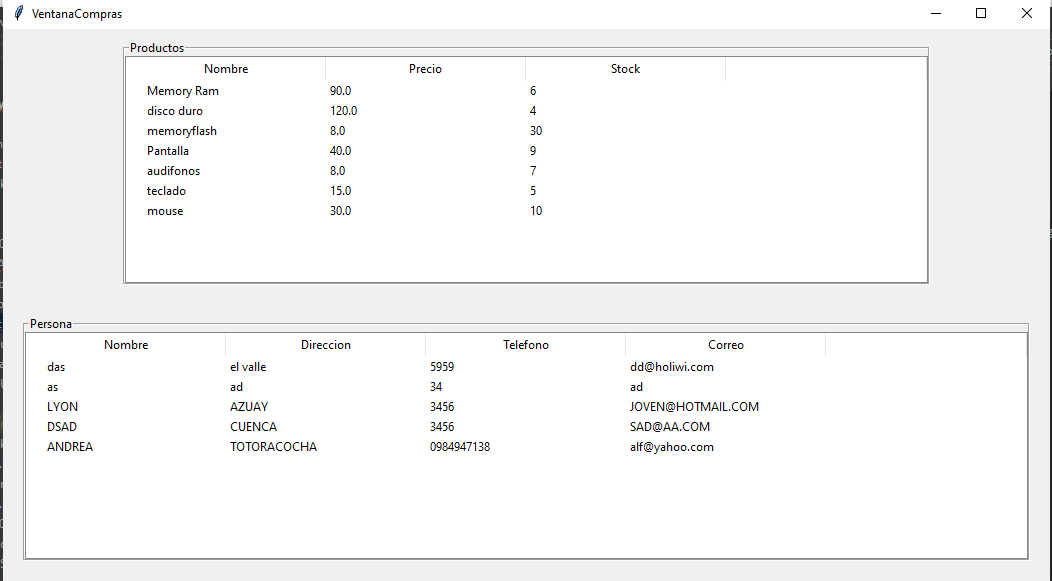

Tenemos 5 clases en nuestro proyecto 
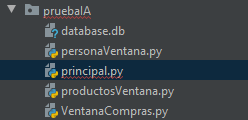